In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# configure visualization default
%matplotlib inline
matplotlib.style.use('seaborn')
matplotlib.rcParams['figure.figsize'] = 12,8
plt.rcParams['axes.labelsize']= 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## 1. Input data and preview

In [3]:
raw_df_train = pd.read_csv('Data/input/train.csv')
raw_df_test = pd.read_csv('Data/input/test.csv')

In [4]:
raw_dfs = [raw_df_train, raw_df_test]

In [5]:
raw_df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
raw_df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
print(raw_df_train.info())
print()
print(raw_df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null

In [8]:
print(raw_df_train.shape)
print()
print(raw_df_test.shape)

(891, 12)

(418, 11)


In [9]:
# check missing values
print(raw_df_train.isnull().sum())
print()
print(raw_df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## 2. Explore and clean data

In [10]:
# drop PassengerId and Ticket column <-- has no relationship with Suivive rate
for df in raw_dfs:
    df.drop(['PassengerId','Ticket'], axis=1, inplace=True)
# drop Cabin column <-- too much missing value
for df in raw_dfs:
    df.drop('Cabin', axis=1, inplace=True)

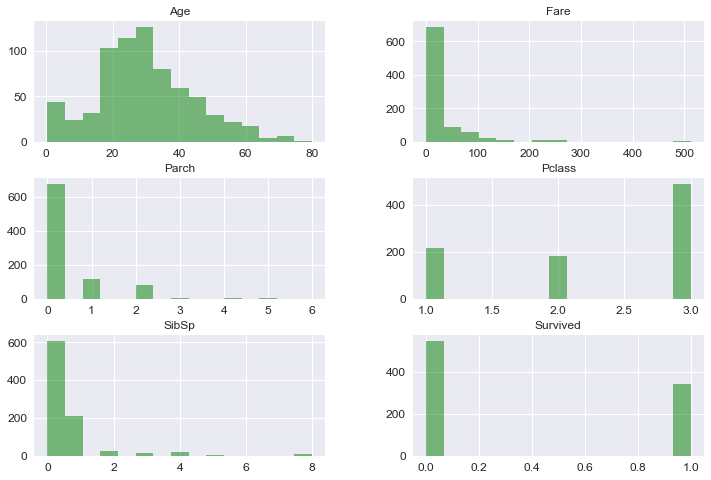

In [11]:
# view the distribution of each variable
raw_df_train.hist(bins=15, layout=(3, 2), color='g', alpha=0.5)
plt.show()

In [12]:
# explore categorical columns
for cat_column in ['Sex', 'Embarked']:
    print(raw_df_train[cat_column].value_counts(dropna=False),'\n')

male      577
female    314
Name: Sex, dtype: int64 

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64 



In [13]:
# handle missing values
# fill missing age with mean value <-- bell shape distribution
# fill Embarked with most frequent one class -- S
# fill Fare with median <-- positive skewed distribution
for df in raw_dfs:
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Embarked'].fillna('S', inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [14]:
# double check missing values
print(raw_df_train.isnull().sum())
print()
print(raw_df_test.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [15]:
# data engineer - add new variables family_size and is_alone
for df in raw_dfs:
    df['family_size'] = df['Parch'] + df['SibSp'] + 1
    df['is_alone'] = (df['family_size'] == 1).astype(int)

In [16]:
# add a new variable title
for df in raw_dfs:
    df['title'] = raw_df_train.Name.str.extract(r'([A-Z][a-z]+\.)')
    df['title'] = df['title'].apply(lambda x: x if x in ['Mr.','Miss.','Mrs.','Master.'] else 'Other title')

In [17]:
# delete title column
for df in raw_dfs:
    df.drop('Name', axis=1, inplace=True)

In [18]:
raw_df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,is_alone,title
0,0,3,male,22.0,1,0,7.2500,S,2,0,Mr.
1,1,1,female,38.0,1,0,71.2833,C,2,0,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,1,1,Miss.
3,1,1,female,35.0,1,0,53.1000,S,2,0,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,1,1,Mr.


## 3. Descriptive analysis

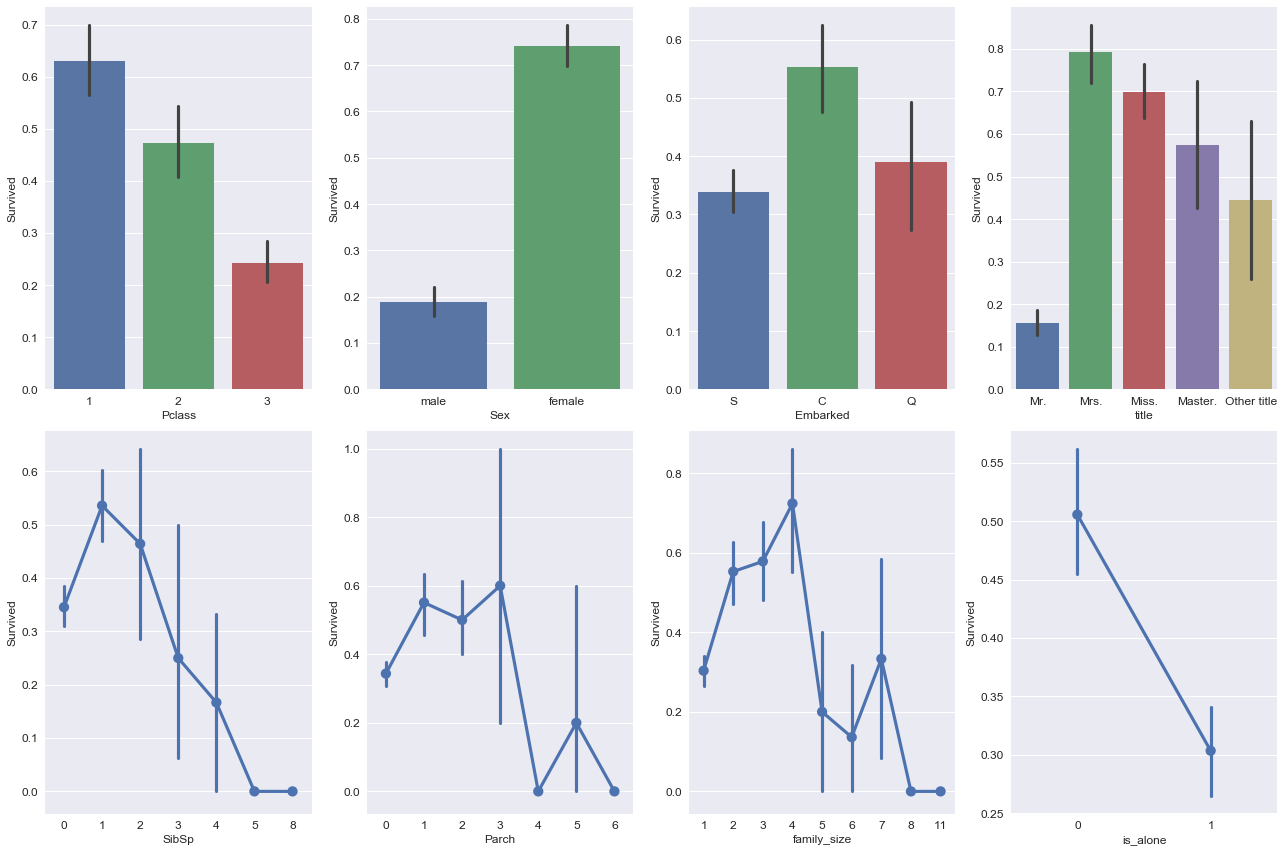

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(18,12))

sns.barplot(x='Pclass', y='Survived', data=raw_df_train, ax=ax[0,0])
sns.barplot(x='Sex', y='Survived', data=raw_df_train, ax=ax[0,1])
sns.barplot(x='Embarked', y='Survived', data=raw_df_train, ax=ax[0,2])
sns.barplot(x='title', y='Survived', data=raw_df_train,  ax=ax[0,3])

sns.pointplot(x='SibSp', y='Survived', data=raw_df_train, ax=ax[1,0])
sns.pointplot(x='Parch', y='Survived', data=raw_df_train, ax=ax[1,1])
sns.pointplot(x='family_size', y='Survived', data=raw_df_train, ax=ax[1,2])
sns.pointplot(x='is_alone', y='Survived', data=raw_df_train, ax=ax[1,3])

plt.tight_layout()
plt.show()

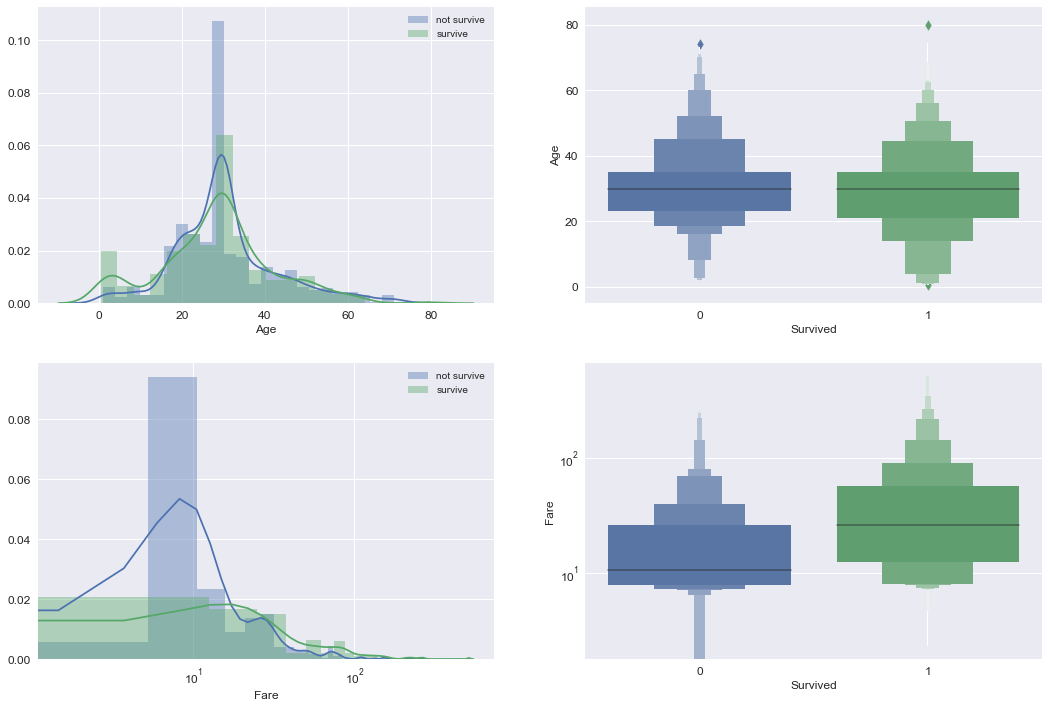

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

sns.distplot(raw_df_train[raw_df_train['Survived'] == 0].Age, label='not survive', ax=ax[0,0])
sns.distplot(raw_df_train[raw_df_train['Survived'] == 1].Age, label='survive', ax=ax[0,0])
ax[0,0].legend()

sns.boxenplot(x='Survived', y='Age', data=raw_df_train, ax=ax[0,1])

sns.distplot(raw_df_train[raw_df_train['Survived'] == 0].Fare, label='not survive', ax=ax[1,0])
sns.distplot(raw_df_train[raw_df_train['Survived'] == 1].Fare, label='survive', ax=ax[1,0])
ax[1,0].set_xscale('log')
ax[1,0].legend()

sns.boxenplot(x='Survived', y='Fare', data=raw_df_train, ax=ax[1,1])
ax[1,1].set_yscale('log')
plt.show()

conclusion of descriptive analysis
1. Female has higher survive rate than male
2. High calss people have higher survive rate than lower class people
3. alone person has lower survive rate compared with people along with family members

## 4. Model data

In [21]:
# convert data for calculation
df_train = pd.get_dummies(raw_df_train, drop_first=True, columns=['Sex', 'Embarked', 'title'])
df_test = pd.get_dummies(raw_df_test, drop_first=True, columns=['Sex', 'Embarked', 'title'])

In [22]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,family_size,is_alone,Sex_male,Embarked_Q,Embarked_S,title_Miss.,title_Mr.,title_Mrs.,title_Other title
0,0,3,22.0,1,0,7.2500,2,0,1,0,1,0,1,0,0
1,1,1,38.0,1,0,71.2833,2,0,0,0,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,1,1,0,0,0
3,1,1,35.0,1,0,53.1000,2,0,0,0,1,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,1,1,0,1,0,1,0,0


In [23]:
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,family_size,is_alone,Sex_male,Embarked_Q,Embarked_S,title_Miss.,title_Mr.,title_Mrs.,title_Other title
0,3,34.5,0,0,7.8292,1,1,1,1,0,0,1,0,0
1,3,47.0,1,0,7.0000,2,0,0,0,1,0,0,1,0
2,2,62.0,0,0,9.6875,1,1,1,1,0,1,0,0,0
3,3,27.0,0,0,8.6625,1,1,1,0,1,0,0,1,0
4,3,22.0,1,1,12.2875,3,0,0,0,1,0,1,0,0


In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

In [25]:
# train test split with train_df for estimate purpose
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=98)

In [26]:
# scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

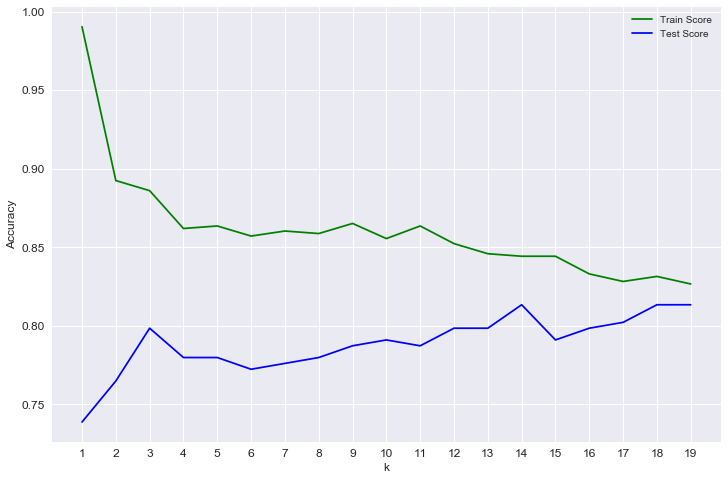

In [27]:
# warmup - knn classifier
train_score_array = []
test_score_array = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score_array.append(knn.score(X_train_scaled, y_train))
    test_score_array.append(knn.score(X_test_scaled, y_test))
    
x_axis = range(1, 20)
plt.plot(x_axis, train_score_array, label='Train Score', c='g')
plt.plot(x_axis, test_score_array, label='Test Score', c='b')
plt.xlabel('k')
plt.xticks(range(1,20))
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
mla = [
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    LinearSVC()
]
# create a compare table
mla_columns = ['MLA name', 'MLA parameters', 'Train Accuracy Mean', 'Test Accuracy Mean', 'Test Accuracy STD*3', 'Train Time']
mla_compare = pd.DataFrame(columns=mla_columns)


for i in range(len(mla)):
    cv_results = cross_validate(estimator=mla[i], X=X, y=y, scoring='accuracy', cv=10)
    mla_compare.loc[i, 'MLA name'] = mla[i].__class__.__name__
    mla_compare.loc[i, 'MLA parameters'] = str(mla[i].get_params())
    mla_compare.loc[i, 'Train Accuracy Mean'] = cv_results['train_score'].mean()
    mla_compare.loc[i, 'Test Accuracy Mean'] = cv_results['test_score'].mean()
    mla_compare.loc[i, 'Test Accuracy STD*3'] = cv_results['test_score'].std() * 3
    mla_compare.loc[i, 'Train Time'] = cv_results['fit_time'].mean()
    
mla_compare.sort_values(by='Test Accuracy Mean', ascending=False, inplace=True)
mla_compare

d:\Applications\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
d:\Applications\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
d:\Applications\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
d:\Applications\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:

,MLA name,MLA parameters,Train Accuracy Mean,Test Accuracy Mean,Test Accuracy STD*3,Train Time
3,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.969945,0.817125,0.134802,0.0173606
1,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.823046,0.813716,0.090218,0.00946772
2,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.985409,0.773328,0.161487,0.00537753
4,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.890385,0.753367,0.147633,0.0303167
0,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.812948,0.728534,0.0962464,0.00248642
5,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.705215,0.698064,0.390102,0.0506618


Text(0.5,1,'MLA compare')

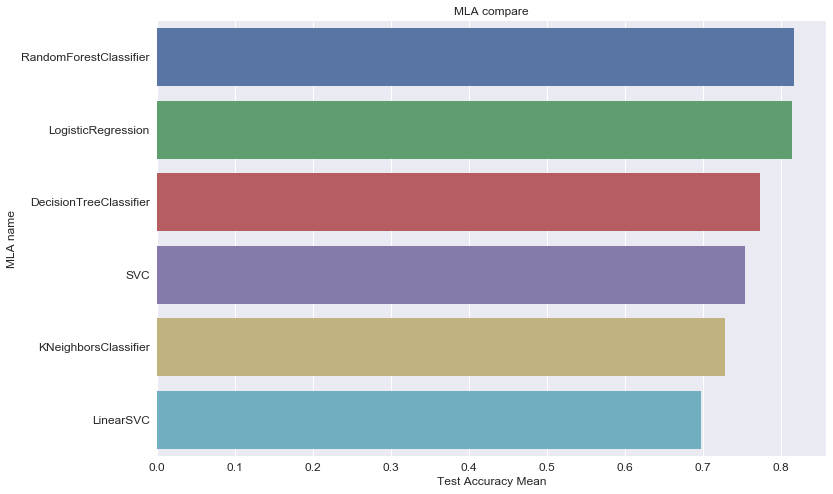

In [29]:
sns.barplot(x='Test Accuracy Mean', y='MLA name', data=mla_compare)
plt.title("MLA compare")

In [30]:
# use gridsearch to tune model - Logistic Regression
lr_row = mla_compare[mla_compare['MLA name'] == 'LogisticRegression']
print("Before parameters: " + lr_row['MLA parameters'])
print("Before Train accuracy mean: " + str(lr_row['Train Accuracy Mean']))
print("Before Test accuracy mean: " + str(lr_row['Test Accuracy Mean']))
print("Before Test accuracy std*3: " + str(lr_row['Test Accuracy STD*3']))

param_grid = {'C':[0.01, 0.1, 1, 10, 100]}
tune_lr = GridSearchCV(LogisticRegression(), param_grid=param_grid, scoring='accuracy', cv=10)
tune_lr.fit(X, y)
print("After parameters: " + str(tune_lr.best_params_))
print("After Train accuracy mean: " + str(tune_lr.cv_results_['mean_train_score'][tune_lr.best_index_]))
print("After Test accuracy mean: " + str(tune_lr.cv_results_['mean_test_score'][tune_lr.best_index_]))
print('After Test accuracy std*3: ' + str(tune_lr.cv_results_['std_test_score'][tune_lr.best_index_]*3))

1    Before parameters: {'C': 1.0, 'class_weight': ...
Name: MLA parameters, dtype: object
Before Train accuracy mean: 1    0.823046
Name: Train Accuracy Mean, dtype: object
Before Test accuracy mean: 1    0.813716
Name: Test Accuracy Mean, dtype: object
Before Test accuracy std*3: 1    0.090218
Name: Test Accuracy STD*3, dtype: object
After parameters: {'C': 10}
After Train accuracy mean: 0.8328971043503783
After Test accuracy mean: 0.8260381593714927
After Test accuracy std*3: 0.08728080579198078


d:\Applications\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [31]:
# use gridsearch to tune model - Random forest
rf_row = mla_compare[mla_compare['MLA name'] == 'RandomForestClassifier']
print("Before parameters: " + rf_row['MLA parameters'])
print("Before Train accuracy mean: " + str(rf_row['Train Accuracy Mean']))
print("Before Test accuracy mean: " + str(rf_row['Test Accuracy Mean']))
print("Before Test accuracy std*3: " + str(rf_row['Test Accuracy STD*3']))

param_grid = {'n_estimators':[10, 20, 30, 40, 50], 'criterion':['gini', 'entropy'], 'max_depth':[2, 4, 6, 10, None]}
tune_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, scoring='accuracy', cv=10)
tune_rf.fit(X, y)
print("After parameters: " + str(tune_rf.best_params_))
print("After Train accuracy mean: " + str(tune_rf.cv_results_['mean_train_score'][tune_rf.best_index_]))
print("After Test accuracy mean: " + str(tune_rf.cv_results_['mean_test_score'][tune_rf.best_index_]))
print('After Test accuracy std*3: ' + str(tune_rf.cv_results_['std_test_score'][tune_rf.best_index_]*3))

3    Before parameters: {'bootstrap': True, 'class_...
Name: MLA parameters, dtype: object
Before Train accuracy mean: 3    0.969945
Name: Train Accuracy Mean, dtype: object
Before Test accuracy mean: 3    0.817125
Name: Test Accuracy Mean, dtype: object
Before Test accuracy std*3: 3    0.134802
Name: Test Accuracy STD*3, dtype: object
After parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 10}
After Train accuracy mean: 0.9309161308788607
After Test accuracy mean: 0.8383838383838383
After Test accuracy std*3: 0.12194243350823136


d:\Applications\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


## 5. Model implement

In [32]:
predict_survived = pd.Series(tune_lr.predict(df_test), name='Survived')

In [33]:
raw_df_test = pd.read_csv('Data/input/test.csv')

In [34]:
pd.concat([raw_df_test['PassengerId'], predict_survived], axis=1).to_csv('submission.csv', index=False)